In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from textutils import TextProcessor

In [2]:
%time TextProcessor.preprocess_folder('wiki_data/german', lang='de_con', join=False)

Try to preprocess documents in wiki_data/german
	---> wiki_data/german/all.txt
Files are successfully processed to wiki_data/german/processed
CPU times: user 4min 57s, sys: 8.59 s, total: 5min 6s
Wall time: 5min 12s


In [3]:
with open('wiki_data/german/processed/all.txt', 'r') as processed_file:
    german_all = processed_file.read().replace('\n', '')

In [4]:
print "Длина документа: " + str(len(german_all))
german_all[:1000]

Длина документа: 226658691


'lnsmthlnsmthsthtlspsdnmfrnnfktvnrgssrdrflmvrntwrttbdnndrgntlchrgssrsnnnmnnchtmtdmwrknvrbndnggbrchthbnmchtvnbswrdsvndrdrctrsgldfmrcdgfrslchsttnnmpfhlnsthrststhmsllnsmthstjdchwtrhnngbrchltrntvschrbwsnsndntrndrmdrsprngsvrntllnsmthswlnsmthnddmsmthchzwtlwsstschnmtndschrbwsnlnsmthndsmshrnghrnsdntrntmvdtbsdzdspsdnmntstndnflgdrrbtnmwstrnflmdthfgnfghtrdtschrttlfrnkptchdnstndnsndgzhltrgssrrbrttttnndhptdrstllrrchrdwdmrkgrtnnnnstrtwrfhndnsgllsnrrgssrngstztwrddrflmtrgnchbschlssdrrbtnnchdtlchtttnshndschrftdrchmhrdrhtglssgldrngrbtthttwshlbdsrdnnnngsnsnmnslsrgssrblhnttttnslbstlhntbrbnfllsblslsngwrdllnsmthlsnmglchstnzgrtgrnmgwhltbdrsptrnvrntlnsmthwrdsngrmmthlsmnvrmtlchknntsthngsgrndndnztgnssschnkrtknwrddrrgssrvnrgrbrtmtdnwrtnglbtkmdprdnlnsmthflmbrnhllwdbrndtschrttlfhrzrhllhllwdndknswsdspsdnmnmgr\xc3\x9frnpblkmbknntmchtnchtzltztwlrthrhllrdrgntlchrgssrdsflmsslbstsnnnmnzrckzgndnlgzmflmttldspsdnmlnsmthbntztdrflmgltlsnrdrschlchtstnflmdrrjhrndgwnnfnfgldnhmbrndrflmsprnvstdrrstpstsmthflmdrtfhrtngwssrthmsllswl

In [5]:
from textutils import TextUtils

normalized_dict = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(german_all, 1, lang='de_con')
)
ordered_dict = TextUtils.get_ordered_dict(normalized_dict, by='value', reverse=True)

In [25]:
def draw__ordered_dict(dct, size=(10, 8)):
    non_zero_items = np.array(dct)[:,0]
    non_zero_values = np.array(ordered_dict)[:,1].astype(np.float64)
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

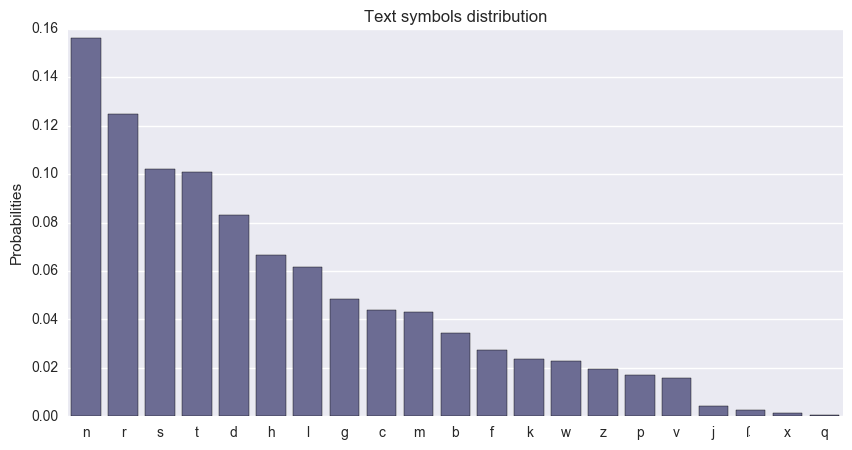

In [26]:
draw__ordered_dict(ordered_dict, (10, 5))

#### Caculate Hurst values for 'n' letter

In [27]:
from textutils import HurstExponent
hurst = HurstExponent(german_all, 'n')

In [28]:
len(hurst.distances)

35351639

In [29]:
%time hurst.calculate(10000)

CPU times: user 1h 22min 39s, sys: 28.9 s, total: 1h 23min 8s
Wall time: 1h 23min 55s


(array([   3.,    6.,   30.,   65.,  123.,  258.,  371.,  455.,  487.,
         482.,  408.,  331.,  238.,  131.,   71.,   37.,   22.,   13.,
           3.,    1.]),
 array([ 0.2535417 ,  0.29050674,  0.32747177,  0.3644368 ,  0.40140183,
         0.43836686,  0.4753319 ,  0.51229693,  0.54926196,  0.58622699,
         0.62319202,  0.66015706,  0.69712209,  0.73408712,  0.77105215,
         0.80801718,  0.84498222,  0.88194725,  0.91891228,  0.95587731,
         0.99284234]),
 <a list of 20 Patch objects>)

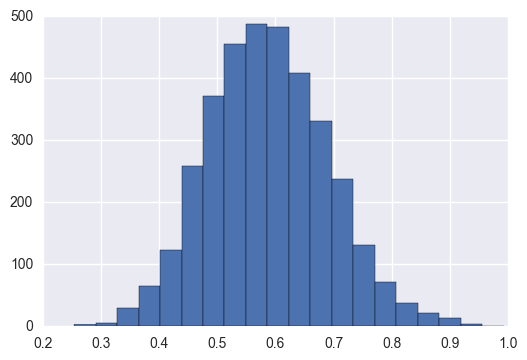

In [30]:
plt.hist(hurst.hurst_values, 20)

In [31]:
with open('hurst_values/german.txt', 'w') as outfile:
    for v in hurst.hurst_values:
        outfile.write(str(v) + '\n')